<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

# Компания - "Ниединогоразрыва.ком"

**Описание работы**

Заказчиком данной работы является оператор связи "Ниединогоразрыва.ком". Цель компании научиться прогнозировать отток клиентов, т.е. если у компании возникнут подозрения о том, что клиент собирается перестать использовать услуги фирмы ему необходимо будет предложить специальные условия или промокод.

**Цель работы**

Основной задаче нашей работы является создание модели машинного обучения, которая будет предсказывать поведение клиента с заданной заказчиком точностью. Это позволит наиболее грамотно использовать финансы комапнии, предлагая специальные купоны и предложения людям, которых модель определила как пользователя, планирующего уйти. Так же это поможет удерживать старых клиентов тем самым в лучшем случае увеличивая свою прибыль или в худшем случае не терять финансы.

**Предоставленные данные**

Прежде чем приступать к осмотру наших данных стоит так же учитывать, что компания "Ниединогоразрыва.ком" предоставляет несколько видов услуг.

*Основные услуги:*
1. Стационарная телефонная связь. Возможно подключение аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL) или оптополоконный кабель (Fiber optic)

*Дополнительные услуги:*
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки(TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Перейдем к представленным заказчиком данным.

*Файлы содержащие необходимые поля:*
- ***contract_new.csv*** - информация о договоре;
- ***personal_new.csv*** - персональные данные клиента;
- ***internet_new.csv*** - информация об интернет-услугах;
- ***phone_new.csv*** - информация об услугах телефонии.

*Описание представленных полей:*
- ***BeginDate*** - дата начала пользования услугами;
- ***EndDate*** - дата окончания пользования услугами;
- ***Type*** - тип оплаты: ежемесячный, годовой и тд;
- ***PaperlessBilling*** - электронный платежный документ;
- ***PaymentMethod*** - способ оплаты;
- ***MonthlyCharges*** - ежемесячные траты на услуги по договору;
- ***TotalCharges*** - всего потрачено денег на услуги;
- ***Dependents*** - наличие иждивенцев;
- ***Senior Citizen*** - наличие пенсионного статуса по возрасту;
- ***Partner*** - наличие супруга(и);
- ***MultipleLines*** - наличие возможности ведения параллельных линий во время звонка.

**План работы**

1. **Загрузка и изучение данных.** Предварительно загружаем данные изучаем количество строк и типы данных.


2. **Предобработка данных.** Объединение таблиц, изменение типов данных, удаление пропусков или заполнение пропусков, удаление дубликатов.


3. **Подготовка данных.** Добавление новых признаков, удаление неинформативных признаков и добавление целевого признака в данные. 


4. **Исследовательский анализ данных.** Более глубокое изучение данных, нахождение зависимостей между данными, поиск аномалий и тд.


5. **Подготовка данных для обучения.** Разбиение выборок, маштабирование признаков, перевод данных в необходимый для обучения модели тип (или кодирование). Так же в данном пункте будет проведен анализ признаков на мультиколлинеарность и удалены некоторые поля при необходимости.


6. **Отчет о проделанной работе.**

## Загрузка и изучение данных

In [1]:
#!pip install phik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
import optuna
import warnings

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    roc_curve
)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    FunctionTransformer,
    OrdinalEncoder
)
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score
)

warnings.filterwarnings('ignore')

In [3]:
SEPARATOR = '\n' + '-' * 120
RANDOM_STATE = 280823
TEST_SIZE = 0.25

Загрузим данные. Так же создадим отдельный список со всеми д

In [4]:
try:
    contract = pd.read_csv('contract_new.csv')
    personal = pd.read_csv('personal_new.csv')
    internet = pd.read_csv('internet_new.csv')
    phone = pd.read_csv('phone_new.csv')
except Exception:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')

Изучим отдельно каждую из таблиц по порядку.

In [5]:
def acquaintance(data):
    display(data.head())
    print(SEPARATOR)
    
    data.info()
    print(SEPARATOR)
    
    display(data.describe())
    print(SEPARATOR)

In [6]:
print(f'Выведем информацию о таблице contract')
acquaintance(contract)

Выведем информацию о таблице contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

------------------------------------------------------------------------------------------------------------------------


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



------------------------------------------------------------------------------------------------------------------------


В данной таблице сразу стоит отметить наличие неправильных типов данных в столбце с датами и в столбце 'TotalCharges'. В дальнейшем это необходимо будет исправить.

In [7]:
print(f'Выведем информацию о таблице personal')
acquaintance(personal)

Выведем информацию о таблице personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

------------------------------------------------------------------------------------------------------------------------


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



------------------------------------------------------------------------------------------------------------------------


In [8]:
print(f'Выведем информацию о таблице internet')
acquaintance(internet)

Выведем информацию о таблице internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

------------------------------------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,0781-LKXBR,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



------------------------------------------------------------------------------------------------------------------------


In [9]:
print(f'Выведем информацию о таблице phone')
acquaintance(phone)

Выведем информацию о таблице phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

------------------------------------------------------------------------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,0781-LKXBR,No
freq,1,3390



------------------------------------------------------------------------------------------------------------------------


**Вывод по пункту 1.**
Для наиболее удобного представления данных, а так же дальнейшего разбиения на признаки и целевые признаки решено объединить таблицы с данными. 

Так же изучив данные можно сделать вывод, что общее количетсво предоставленных для работы данных - 7043 строки. В таблицах internet и phone количество данных не равно общему количеству представленных данных, что логично поскольку какие-то пользователи могут не использовать какую-либо из услуг и следовательно информации о них не будет в соответствующей таблице. Так же отсутствие строк в двух таблицах при объединение может привести к утере данных, поэтому важно правильно определить порядок объединения. И это может привести к появлению пропусков в датасете и с этим тоже необходимо будет бороться.

Стоит отметить, что некоторые поля содержат некорректный тип данных, который необходимо будет изменить. Это поля:
- **TotalCharges**
- **BeginDate**
- **EndDate**
- **SeniorCitizen**

Так же значения в 'No' в поле EndDate необходимо заменить на более понятную интропретацию поскольку скорее всего люди имеющие статус 'No' все еще являются клиентами. 

**Уточняющих вопросов - нет**

## Предобработка данных

На данном этапе мы объединим полученные таблицы, удалим неинформативные признаки и добавим целевой признак.

In [10]:
# Объединим таблицы с помощью метода .merge()
data = contract.merge(personal, how='outer', on='customerID') \
    .merge(internet, how='outer', on='customerID') \
    .merge(phone, how='outer', on='customerID')

display(data.head(10))
data.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Поскольку количество строк равно макимальному количеству строк в таблице contract, можно сделать вывод, что все данные успешно перенеслись без потерь. 

Теперь можно перейти к добавлению новых признаков, добавлению целевого признакак и удалению неинформативных признаков. Для создания признаков нам понадобиться работать с датой, поэтому сначала переведем данные в необходимый тип.

In [11]:
# Изменим тип данных в столбец TotalCharges, EndDate, BeginDate
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['EndDate'] = pd.to_datetime(data.EndDate, format='%Y-%m-%d', errors='coerce')
data['BeginDate'] = pd.to_datetime(data.BeginDate, format='%Y-%m-%d', errors='coerce')

In [12]:
# Проверим правильность перевода данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Перейдем к заполнению пропусков, для этого просмотрим на количество пропусков в полях.

In [13]:
pd.DataFrame(data.isna().mean() * 100) \
    .style.set_precision(2) \
    .background_gradient('coolwarm')

,0
customerID,0.00
BeginDate,0.00
EndDate,84.37
Type,0.00
PaperlessBilling,0.00
PaymentMethod,0.00
MonthlyCharges,0.00
TotalCharges,0.16
gender,0.00
SeniorCitizen,0.00


Cначала заполним пропуски в поле EndDate. Заполнять будем датой выгрузки из базы, поскольку тогда мы сможем корректно посчитать длительность контракта в днях для создания нового целевого признака. Так же стоит учесть что клиенты будут считаться активными если дата в EndDate соответствует дате выгрузки.

In [14]:
# Заполним пропуски в столбце EndDate
data['EndDate'] = data['EndDate'].fillna(pd.to_datetime('2020-02-01'))

In [15]:
data.loc[data['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Мы можем заметить, что записи с пропусками в колонке TotalCharges не имеют пропусков в колонке MonthlyCharges, а следовательно, они осуществляют траты, но при этом по некой причине отсутствует общее количество трат. Вероятно, это вызвано ошибкой при выгрузке данных или при их сборе. Так как таких записей немного, всего 0,16 процента, и действительное значение вряд ли можно восстановить, мы просто удалим такие данные.

In [16]:
data = data.dropna(subset=['TotalCharges'])

Все остальные пропуски находятся в колонках с услугами, и процент пропусков одинаков во всех колонках, что говорит о том, что, вероятно, некоторые люди просто не используют определенные виды услуг. Однако, поскольку мы не можем точно определить причину появления пропусков, для их заполнения мы воспользуемся фиктивными данными.

In [17]:
data = data.fillna('Unknown')

In [18]:
pd.DataFrame(data.isna().mean() * 100) \
    .style.set_precision(2) \
    .background_gradient('coolwarm')

,0
customerID,0.00
BeginDate,0.00
EndDate,0.00
Type,0.00
PaperlessBilling,0.00
PaymentMethod,0.00
MonthlyCharges,0.00
TotalCharges,0.00
gender,0.00
SeniorCitizen,0.00


В нашем датафрейме не осталось пропусков, так же проверим общую информацию о таблице, чтобы избежать ошибок. 

In [19]:
data['SeniorCitizen'] = data.SeniorCitizen.astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   object        
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   7032 non-null   object        
 13  OnlineSecurity    7032 non-null   object        
 14  OnlineBackup      7032 n

Проверим данные на наличие дубликатов

In [20]:
print(f'Количесво дубликатов - {data.duplicated().sum()}')

Количесво дубликатов - 0


## Подготовка данных

В данном пункте мы добавим новый признак DayDuration, который будет показывать длительность контракта в днях.

In [21]:
# Добавим новый столбец с длительностью контракта в днях
data['DayDuration'] = (data['EndDate'] - data['BeginDate']).dt.days

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   object        
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   7032 non-null   object        
 13  OnlineSecurity    7032 non-null   object        
 14  OnlineBackup      7032 n

Теперь создадим целевой признак.

In [23]:
data['StillUser'] = 0
data.loc[data['EndDate'] == pd.to_datetime('2020-02-01'), 'StillUser'] = 1

После добавления целевого признака избавимся от неинформативных признаков к котором относятся столбцы: 

- **EndDate** - поскольку показывает когда пользователь прекратил использовать ресурс 
- **customerID** - т.к. это уникальный ID пользователя
- **gender** - поскольку вряд ли пол влияет на длительность пользования услугами фирмы
- **BeginDate** - так как вместо него имеется признак DayDuration

Удалим эти признаки

In [24]:
data = data.drop('EndDate', axis=1)
data = data.drop('customerID', axis=1)
data = data.drop('gender', axis=1)
data = data.drop('BeginDate', axis=1)

## Исследовательский анализ данных

Для начала построим распределение данных в каждом из столбцов нашего датасета. 

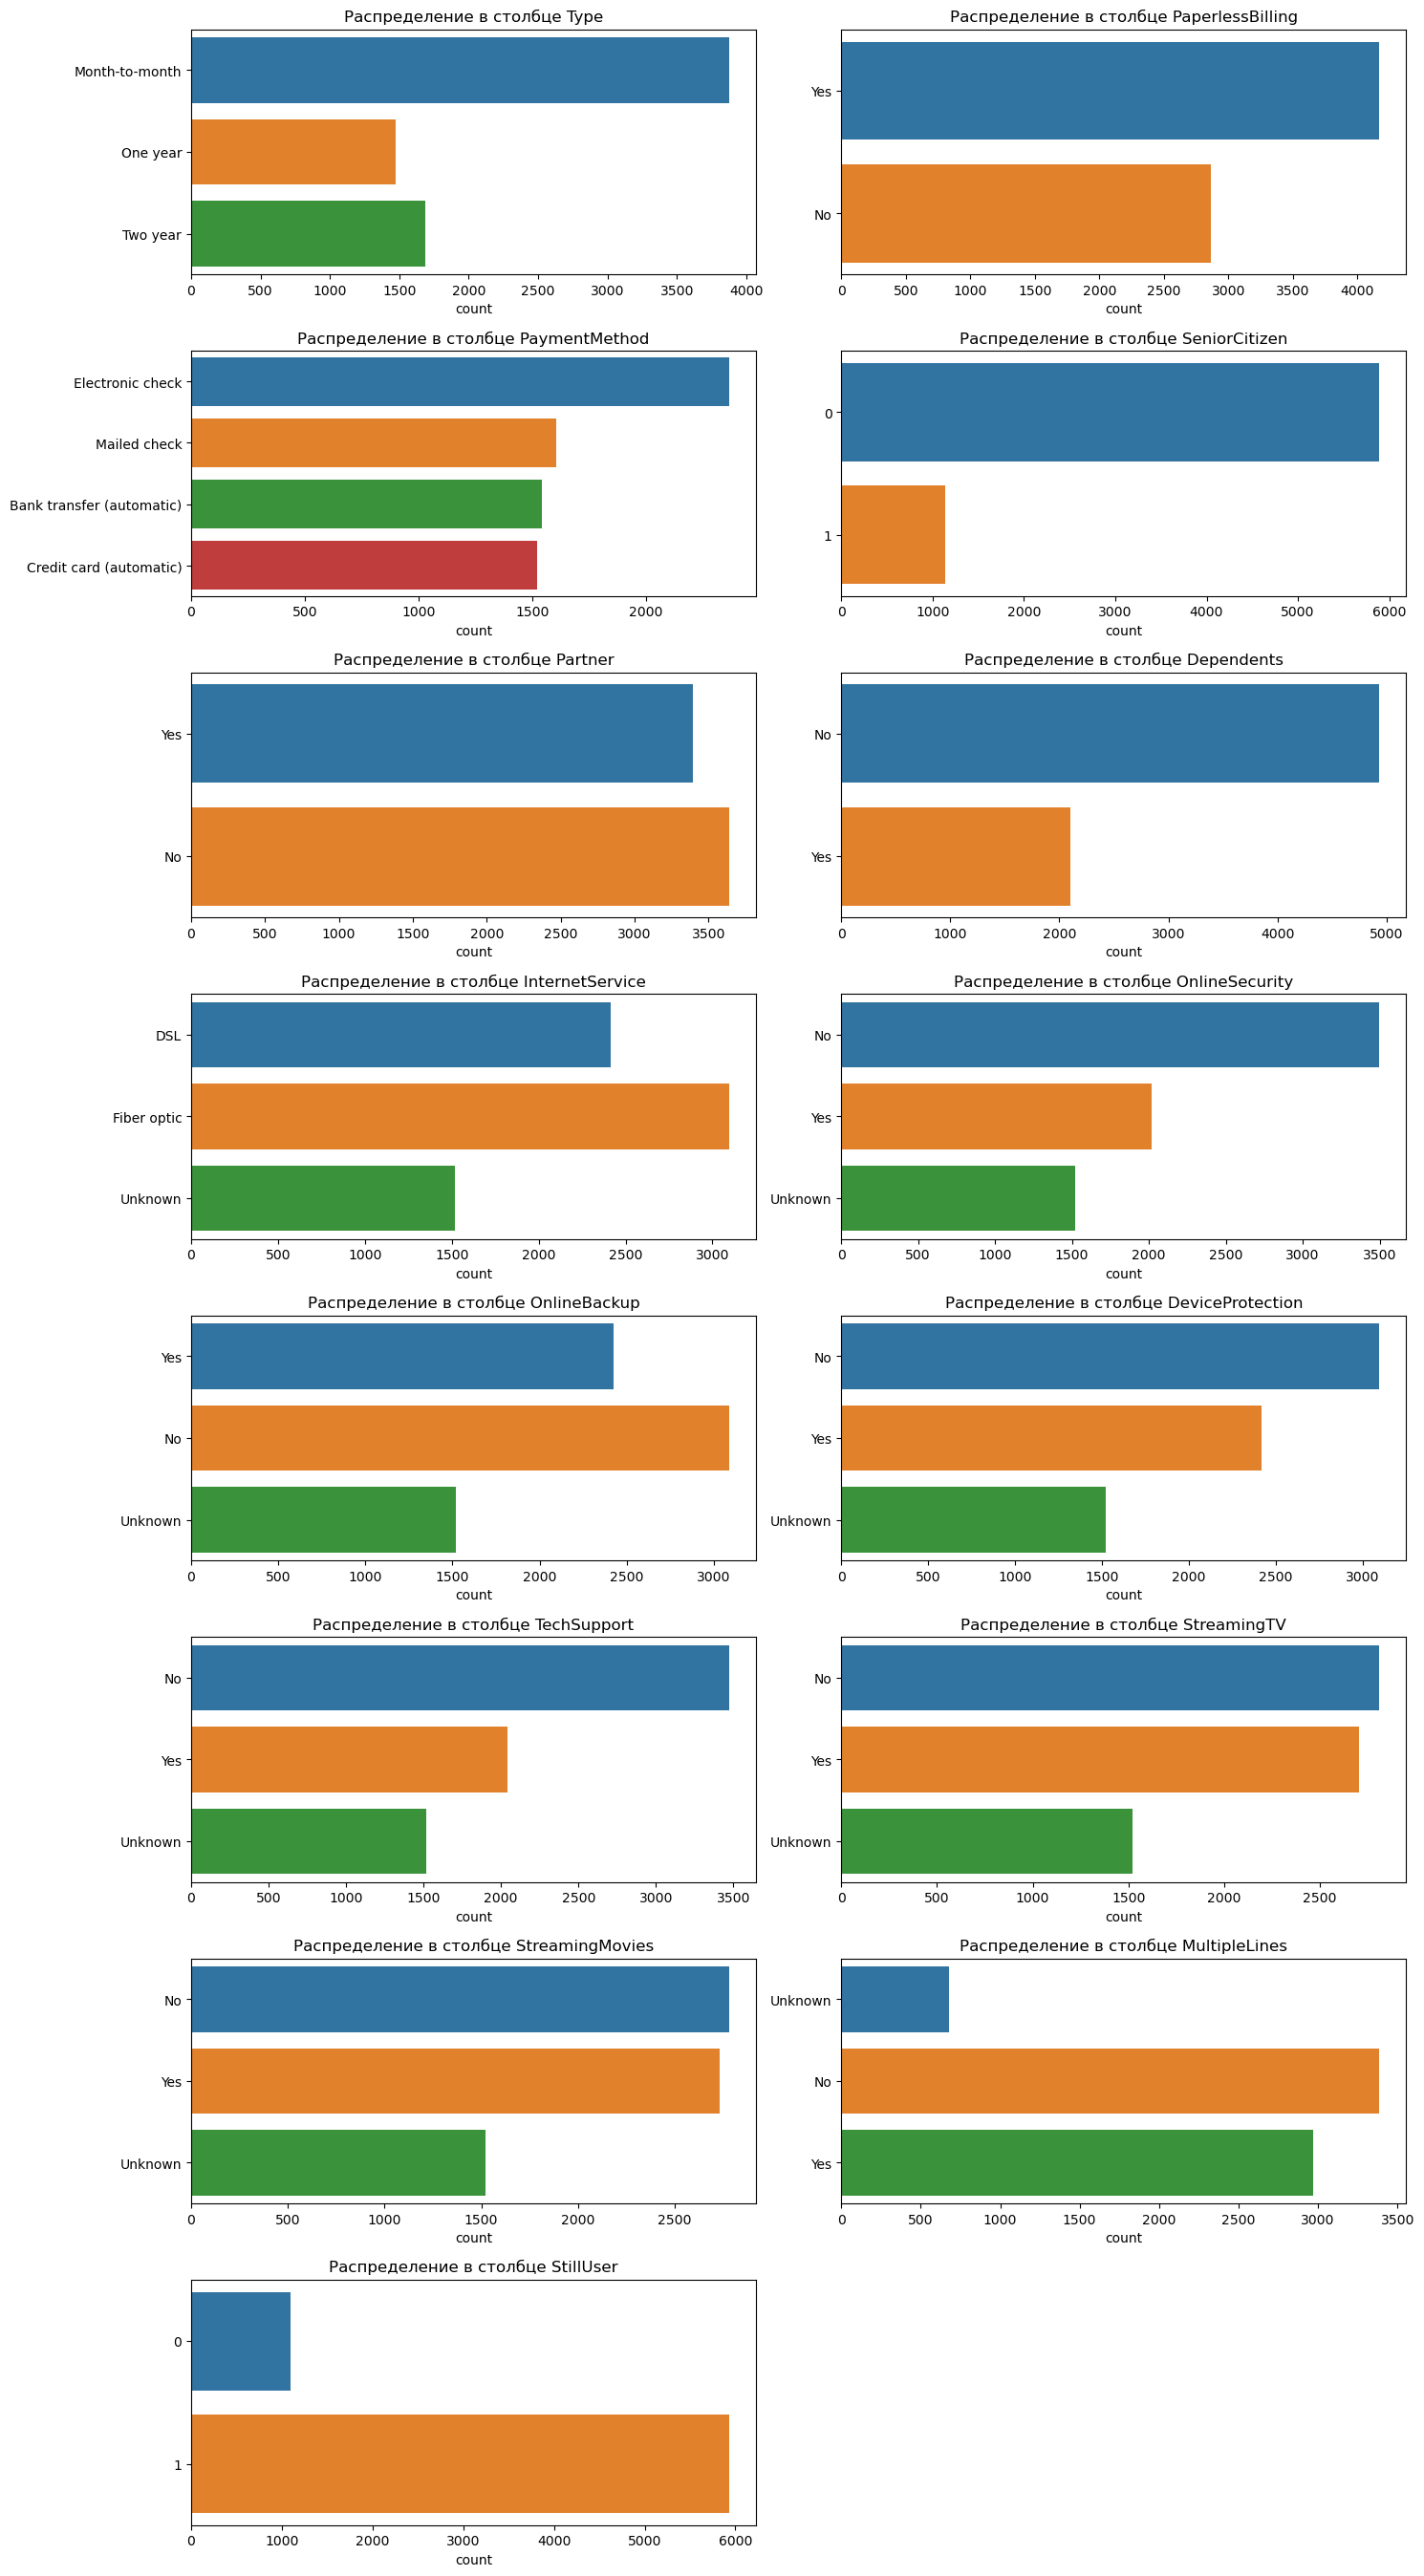

In [25]:
columns = list(data.columns)
num_col = ['TotalCharges', 'MonthlyCharges', 'DayDuration']

count = 0
fig = plt.figure(figsize=(15, 30))
for i in columns:
    if i not in num_col:
        count += 1
        fig.add_subplot(9, 2, count)
        ax = sns.countplot(data=data, y=i)
        ax.set_ylabel('')
        ax.set_title(f'Распределение в столбце {i}')
        fig.tight_layout()

Стоит отметить, что целевой признак имеет явный перевес по классам.

In [26]:
percent_1 = (data.StillUser.sum() / data.StillUser.count()) * 100
percent_0 = 100 - percent_1
print(f'Процент активных пользователей - {round(percent_1, 2)}%. \
      Неактивных - {round(percent_0, 2)}%')

Процент активных пользователей - 84.34%.       Неактивных - 15.66%


Теперь посмотрим распределения в столбцах с численными данными.

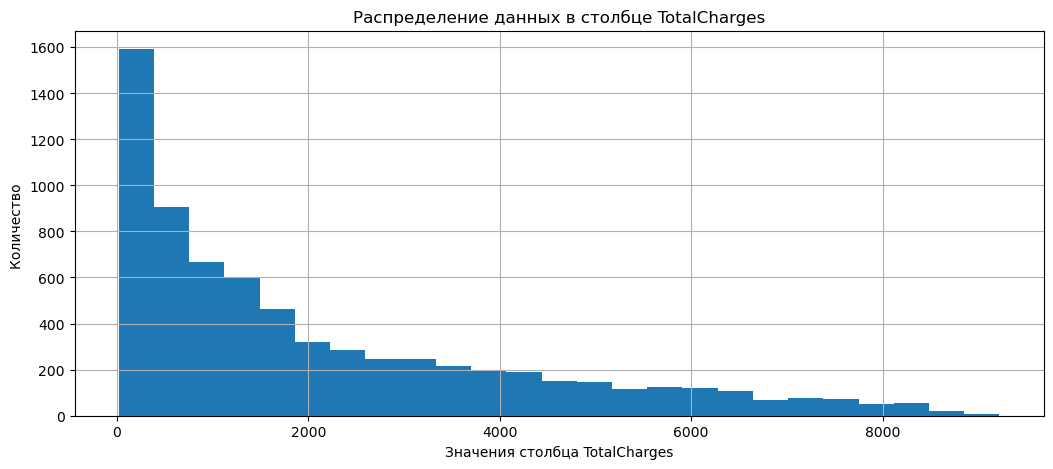

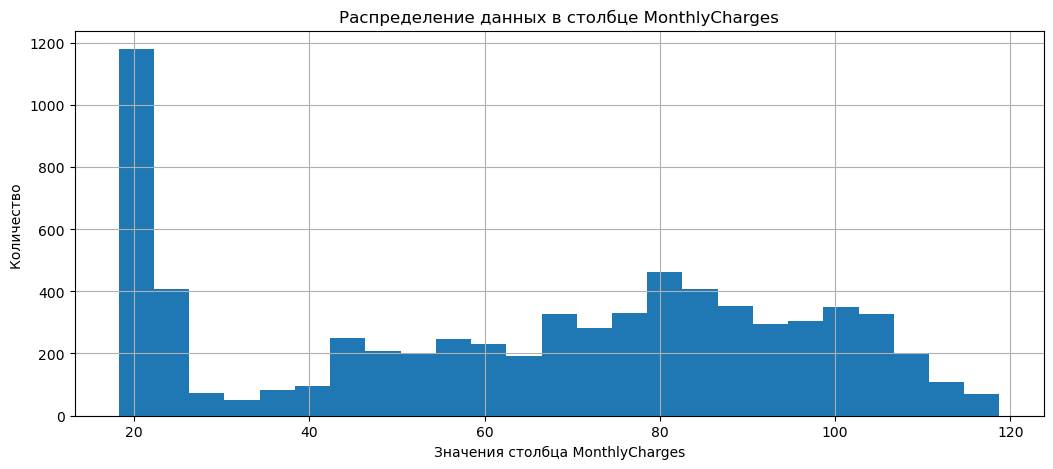

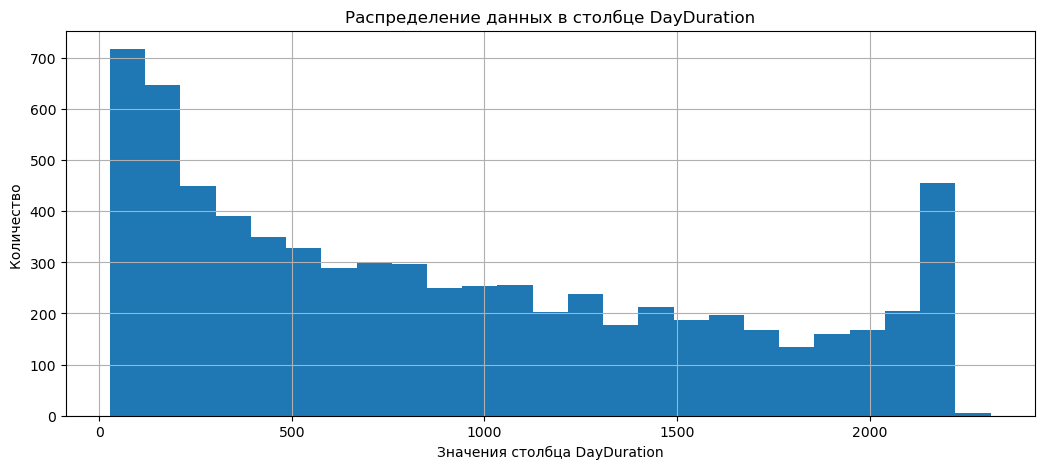

In [27]:
for i in num_col:
    fig = plt.figure(figsize=(12.5, 5))
    plt.title(f'Распределение данных в столбце {i}')
    plt.xlabel(f'Значения столбца {i}')
    plt.ylabel('Количество ')
    plt.hist(data=data, x=i, bins=25)
    plt.grid()

**Вывод по пункту 4:**

*Категорианльные паризнаки:*

Основываясь на результатах анализа категориальных признаков, мы можем заключить, что количество пользователей, использующих определенные услуги, значительно меньше, чем количество людей, не использующих никакие услуги.

Также можно заметить, что число людей пенсионного возраста и с детьми значительно меньше, чем число людей, к которым эти категории применимы. Отсюда мы можем сделать вывод, что большая часть пользователей - это молодые люди.

Кроме того, стоит отметить, что большинство пользователей предпочитают оплачивать услуги по методу month-to-month (с регулярными платежами).

Также в нашем наборе данных целевой признак имеет очень высокий дисбаланс классов. Это связано с тем, что активных пользователей (тех, кто использует услуги) 84.34% от общего объема данных.

*Числовые признаки:*

Мы видим, что небольшое количество пользователей тратит на услуги большое количество денег. Это ясно показывает график распределения значений в поле TotalCharge.

Можно также отметить, что распределение пользователей по продолжительности их использования имеет пики как в начале, так и в конце. Это может говорить о том, что компании удается удерживать старых пользователей, а также привлекать новых.

## Подготовка данных для обучения

Проверим данные на мультикоррениарность

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'DayDuration', 'StillUser']


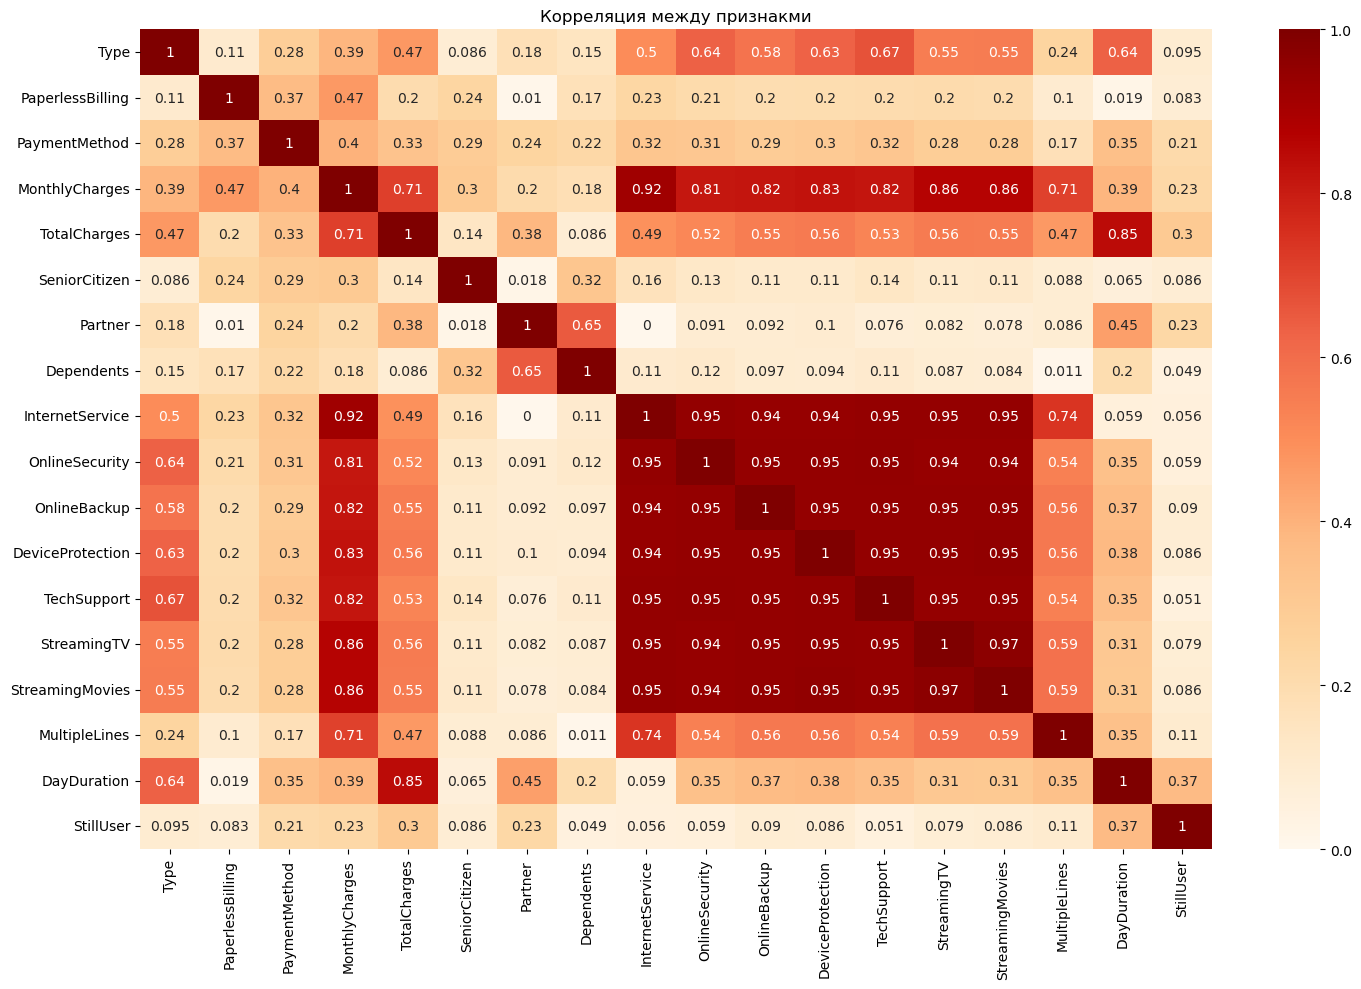

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.phik_matrix(), cmap='OrRd', annot=True)

plt.title('Корреляция между признакми')
plt.tight_layout()

В корреляционной матрице можно заметить, что колонки с услугами сильно коррелируют с колонкой MonthlyCharges. Это логично, так как чем больше услуг использует клиент, тем больше денег он тратит в месяц. Услуги также сильно коррелируют друг с другом. Поэтому, чтобы модель обучалась лучше, было принято решение удалить колонки с услугами, оставив только одну колонку **OnlineSecurity**

In [29]:
data = data.drop(['InternetService',
                  'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'TotalCharges'], axis=1)

Посмотроим на матрицу корреляции после удаления признаков.

interval columns not set, guessing: ['MonthlyCharges', 'DayDuration', 'StillUser']


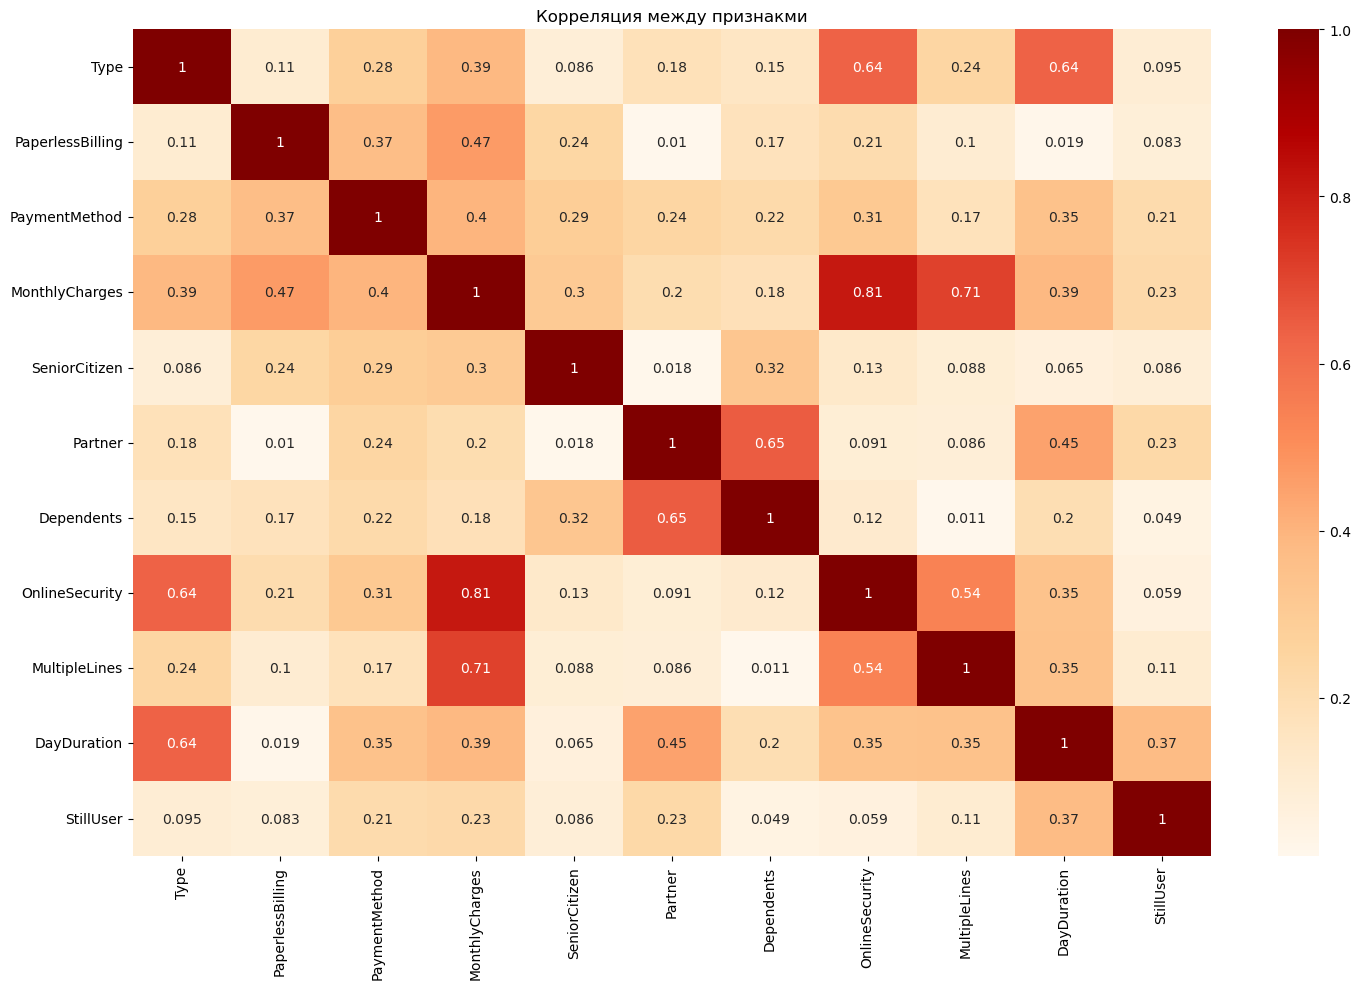

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data.phik_matrix(), cmap='OrRd', annot=True)

plt.title('Корреляция между признакми')
plt.tight_layout()

Теперь разобъем наши данные на тренировочную и тестовую выборку. Поскольку для обчуения мы будем использовать кросс-валидацю, то хватит и двух выборок.

In [31]:
# Разобъем данные на признаки и целевой признак
features = data.drop('StillUser', axis=1)
target = data['StillUser']

Добавим новые признаки в наш датасет, поскольку после удаления их количество значительно сократилось.

In [32]:
# Разобъем данные на тренировочную и тестовую выборки
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, test_size=TEST_SIZE,
                     stratify=target, random_state=RANDOM_STATE)

In [33]:
# Проверим соотношение тренировочной выборки к тестовой
test_percent = (features_test.shape[0] / features_train.shape[0]) * 100
train_percent = 100 - test_percent
print(f'Тренировочная выборка - {train_percent:.2f}%, \
      тестовая - {test_percent:.2f}%')

Тренировочная выборка - 66.67%,       тестовая - 33.33%


Подготовим Pipeline для обработки признаков. 

In [34]:
# Составим список категориальных признаков и численных
# Категориальные кризнаки
cat_features = features_train.select_dtypes(include=np.object).columns.tolist()
# Численные признаки
num_features = [x for x in features.columns if x not in cat_features]

col_transformer_ohe = make_column_transformer(
    (
        OneHotEncoder(),
        cat_features
    ),
    (
        StandardScaler(),
        num_features
    ),
    remainder='passthrough'
)

col_transformer_oe = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        cat_features
    ),
    (
        StandardScaler(),
        num_features
    ),
    remainder='passthrough'
)

Приступим к обучению моделей.

**Обучим модель LogisticRegression**

In [35]:
# optuna.logging.disable_default_handler()
def objective_log(trial):
    param = {
        'C': trial.suggest_loguniform('C', 1e-5, 1e5),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

    model = LogisticRegression(**param, random_state=RANDOM_STATE)
    pipeline = make_pipeline(col_transformer_ohe, model)

    cv_scores = cross_val_score(pipeline,
                                features_train, target_train,
                                cv=5, scoring='roc_auc')
    roc_auc = np.mean(cv_scores)

    return roc_auc

In [36]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(objective_log, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print("Лучшие параметры:", best_params)
print("Лучшее значение roc_auc:", best_score)

[I 2023-10-01 22:33:04,782] A new study created in memory with name: no-name-2567d583-e071-4406-9dac-c3a425093f89
[I 2023-10-01 22:33:05,266] Trial 0 finished with value: 0.7479772081359122 and parameters: {'C': 37063.56667598559, 'max_iter': 470}. Best is trial 0 with value: 0.7479772081359122.
[I 2023-10-01 22:33:05,679] Trial 1 finished with value: 0.7475811551344457 and parameters: {'C': 0.07090463836493362, 'max_iter': 147}. Best is trial 0 with value: 0.7479772081359122.
[I 2023-10-01 22:33:06,074] Trial 2 finished with value: 0.7362918985275136 and parameters: {'C': 0.005750662824073553, 'max_iter': 896}. Best is trial 0 with value: 0.7479772081359122.
[I 2023-10-01 22:33:06,469] Trial 3 finished with value: 0.7383883671382949 and parameters: {'C': 0.00689947163000067, 'max_iter': 847}. Best is trial 0 with value: 0.7479772081359122.
[I 2023-10-01 22:33:06,868] Trial 4 finished with value: 0.7479194239440428 and parameters: {'C': 0.35812724684886144, 'max_iter': 564}. Best is tr

Лучшие параметры: {'C': 4.304882603844591, 'max_iter': 287}
Лучшее значение roc_auc: 0.7480465325801193
Wall time: 1min 24s


**Обучим модель случайный лес**

In [37]:
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }

    model = RandomForestClassifier(**param, random_state=RANDOM_STATE)
    pipeline = make_pipeline(col_transformer_oe, model)

    cv_scores = cross_val_score(pipeline,
                                features_train, target_train,
                                cv=5, scoring='roc_auc')
    roc_auc = np.mean(cv_scores)

    return roc_auc

In [38]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=35)

best_params = study.best_params
best_score = study.best_value

print("Лучшие параметры:", best_params)
print("Лучшее значение roc_auc:", best_score)

[I 2023-10-01 22:34:30,059] A new study created in memory with name: no-name-ac22f71f-43e2-4edd-8803-86c5093d5ddb
[I 2023-10-01 22:34:42,952] Trial 0 finished with value: 0.8234271917014594 and parameters: {'n_estimators': 285, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8234271917014594.
[I 2023-10-01 22:34:59,609] Trial 1 finished with value: 0.8233013701905104 and parameters: {'n_estimators': 397, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8234271917014594.
[I 2023-10-01 22:35:06,008] Trial 2 finished with value: 0.8235336710813975 and parameters: {'n_estimators': 144, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.8235336710813975.
[I 2023-10-01 22:35:20,665] Trial 3 finished with value: 0.8239107597613037 and parameters: {'n_estimators': 286, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 3 with

Лучшие параметры: {'n_estimators': 381, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 1}
Лучшее значение roc_auc: 0.8283893996864112
Wall time: 7min 26s


**Обучим модель LGBM**

In [39]:
def objective_lgbm(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }

    model = LGBMClassifier(**param, random_state=RANDOM_STATE)
    pipeline = make_pipeline(col_transformer_oe, model)

    cv_scores = cross_val_score(pipeline,
                                features_train, target_train,
                                cv=5, scoring='roc_auc', n_jobs=-1)
    roc_auc = np.mean(cv_scores)

    return roc_auc

In [40]:
%%time
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=100)

best_params = study_lgbm.best_params
best_score = study_lgbm.best_value

print("Лучшие параметры:", best_params)
print("Лучшее значение roc_auc:", best_score)

[I 2023-10-01 22:41:56,500] A new study created in memory with name: no-name-24560ec6-e8e0-4a58-99dc-62a365ed2777
[I 2023-10-01 22:42:09,366] Trial 0 finished with value: 0.8694502567386321 and parameters: {'num_leaves': 142, 'max_depth': 22, 'learning_rate': 0.35033823319162233, 'n_estimators': 859, 'min_child_samples': 3, 'subsample': 0.8759042543652779, 'colsample_bytree': 0.9833642649016775, 'reg_alpha': 1.1753956613466199, 'reg_lambda': 4.746524114597991}. Best is trial 0 with value: 0.8694502567386321.
[I 2023-10-01 22:42:14,955] Trial 1 finished with value: 0.8372347510827242 and parameters: {'num_leaves': 391, 'max_depth': 69, 'learning_rate': 0.3905022145491442, 'n_estimators': 347, 'min_child_samples': 20, 'subsample': 0.2505246722185186, 'colsample_bytree': 0.622326281737434, 'reg_alpha': 7.125512776468556, 'reg_lambda': 6.099160933005981}. Best is trial 0 with value: 0.8694502567386321.
[I 2023-10-01 22:42:20,495] Trial 2 finished with value: 0.8327399723317195 and paramete

Лучшие параметры: {'num_leaves': 398, 'max_depth': 19, 'learning_rate': 0.35989303810750894, 'n_estimators': 673, 'min_child_samples': 4, 'subsample': 0.3896438177941124, 'colsample_bytree': 0.10017372416652745, 'reg_alpha': 1.1804695021487253, 'reg_lambda': 2.513041126402558}
Лучшее значение roc_auc: 0.9162419660130322
Wall time: 2min 4s


In [41]:
%%time
study_lgbm.optimize(objective_lgbm, n_trials=200)

best_params = study_lgbm.best_params
best_score = study_lgbm.best_value

print("Лучшие параметры:", best_params)
print("Лучшее значение roc_auc:", best_score)

[I 2023-10-01 22:44:02,113] Trial 100 finished with value: 0.9045668333848464 and parameters: {'num_leaves': 173, 'max_depth': 22, 'learning_rate': 0.4405882142191929, 'n_estimators': 657, 'min_child_samples': 6, 'subsample': 0.2850634011873803, 'colsample_bytree': 0.23614527464298668, 'reg_alpha': 1.1526734621271642, 'reg_lambda': 2.0322624671838487}. Best is trial 72 with value: 0.9162419660130322.
[I 2023-10-01 22:44:02,981] Trial 101 finished with value: 0.9152192065928626 and parameters: {'num_leaves': 151, 'max_depth': 46, 'learning_rate': 0.46929499558663473, 'n_estimators': 545, 'min_child_samples': 8, 'subsample': 0.2657263104526595, 'colsample_bytree': 0.1378266146117114, 'reg_alpha': 1.5162327166353418, 'reg_lambda': 2.336010744579258}. Best is trial 72 with value: 0.9162419660130322.
[I 2023-10-01 22:44:04,322] Trial 102 finished with value: 0.9023395465582432 and parameters: {'num_leaves': 210, 'max_depth': 42, 'learning_rate': 0.38257123193282466, 'n_estimators': 558, 'mi

Лучшие параметры: {'num_leaves': 398, 'max_depth': 19, 'learning_rate': 0.35989303810750894, 'n_estimators': 673, 'min_child_samples': 4, 'subsample': 0.3896438177941124, 'colsample_bytree': 0.10017372416652745, 'reg_alpha': 1.1804695021487253, 'reg_lambda': 2.513041126402558}
Лучшее значение roc_auc: 0.9162419660130322
Wall time: 4min 11s


По результатам исследования моделей можно сделать вывод, что лучше всего подходит модель градиентного бустинга LGBMClassifier. Поэтому для проверки на выборке будем использовать именно эту модель с параметрами представленными ниже:

In [42]:
study_lgbm.best_params

{'num_leaves': 398,
 'max_depth': 19,
 'learning_rate': 0.35989303810750894,
 'n_estimators': 673,
 'min_child_samples': 4,
 'subsample': 0.3896438177941124,
 'colsample_bytree': 0.10017372416652745,
 'reg_alpha': 1.1804695021487253,
 'reg_lambda': 2.513041126402558}

Проверим модель на тестовой выборке.

In [43]:
model_test = LGBMClassifier(random_state=RANDOM_STATE)

pipeline_test = make_pipeline(col_transformer_oe, model_test)
pipeline_test.fit(features_train, target_train)
predict_proba = pipeline_test.predict_proba(features_test)
predict = pipeline_test.predict(features_test)

auc = roc_auc_score(target_test, predict_proba[:, 1])
acuraccy = accuracy_score(target_test, pipeline_test.predict(features_test))
print(f'AUC-ROC итоговой модели - {round(auc, 3)}')
print(f'accuracy итоговой модели - {round(acuraccy, 3)}')

AUC-ROC итоговой модели - 0.912
accuracy итоговой модели - 0.903


В результате проверки модели на тестовой выборке нами была получена метрика ROC-AUC - 0.912 и Accuracy - 0.903.

**Анализ важности признаков**

Теперь произведем анализ важности признаков. Анализ будем произваодить на модели, которая прошла проверку на тестовой выборке.

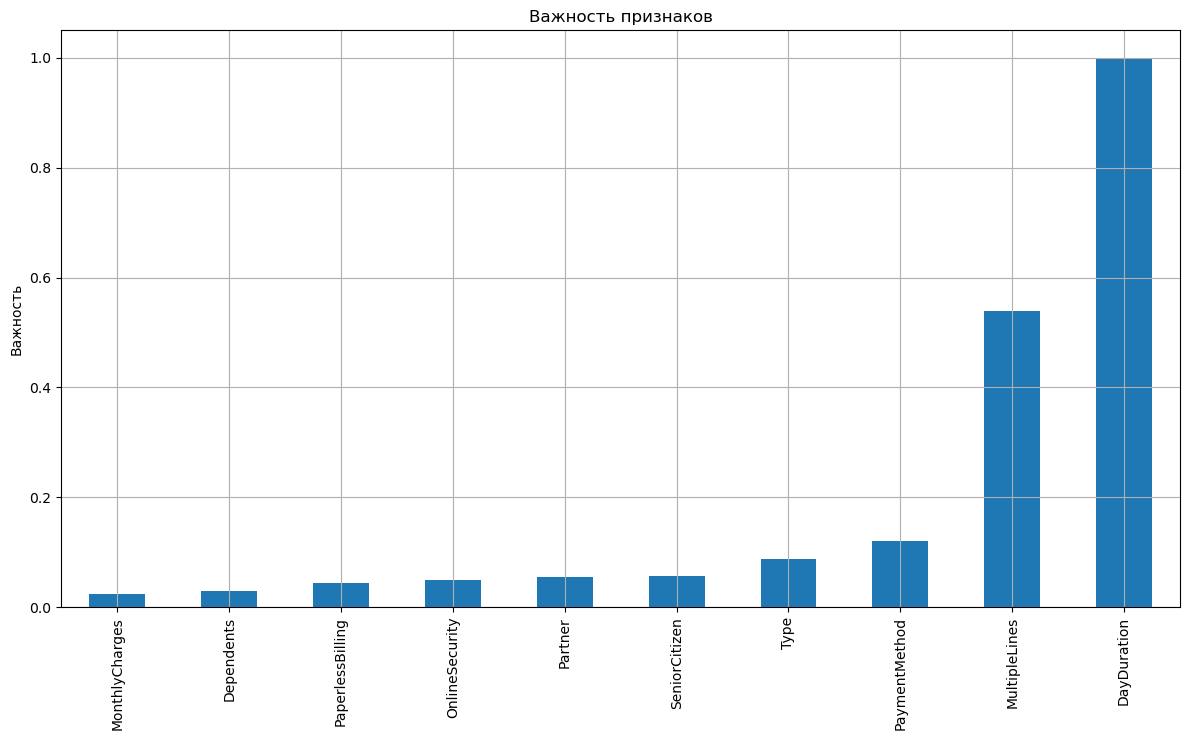

In [44]:
importance = pd.Series(pipeline_test.steps[1][1].feature_importances_, 
                       features.columns).sort_values()
importance = importance / max(importance)

fig, ax = plt.subplots(figsize=(12,7.5))
importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
ax.grid()
fig.tight_layout()

Мы видим, что модель больше всего полагалась на признак DayDuration. Также месячные затраты помогли модели определить класс пользователя. Из этого графика можно сделать вывод, что для модели проще классифицировать данные на основе числовых данных, так как их легче разделить, чем находить взаимосвязи между категориальными переменными.

**Построим матрицу ошибок**

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

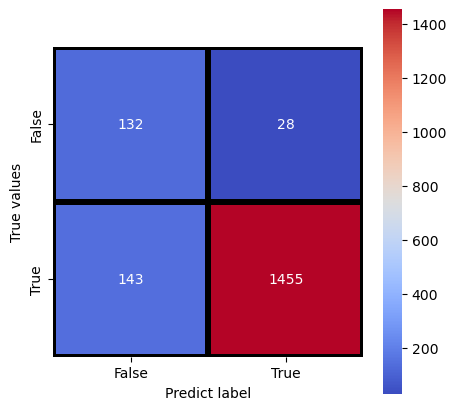

In [45]:
conf_matrix = confusion_matrix(predict, target_test)

plt.figure(figsize=(5, 5))
ax = sns.heatmap(conf_matrix, annot=True, cmap='coolwarm',
                 linewidths=3, linecolor='black',
                 square=True, fmt='d')
ax.set_ylabel('True values')
ax.set_xlabel('Predict label')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

In [46]:
target_test.shape

(1758,)

Так как “StillUser = 1”, то модель упустила клиента только в 28 случаях и отправила клиенту промокод или предоставила скидку в 143 случаях, когда клиент собирался остаться. Учитывая, что общее число данных составляет 1758, можно с уверенностью сказать, что наша модель пропускает клиента в 1,6% случаев, что является очень хорошим показателем эффективности модели. При этом модель не раздает купоны беспорядочно, поскольку процент ошибок при отправке купонов составляет всего 8%.

**Построим ROC - кривую итоговой модели**

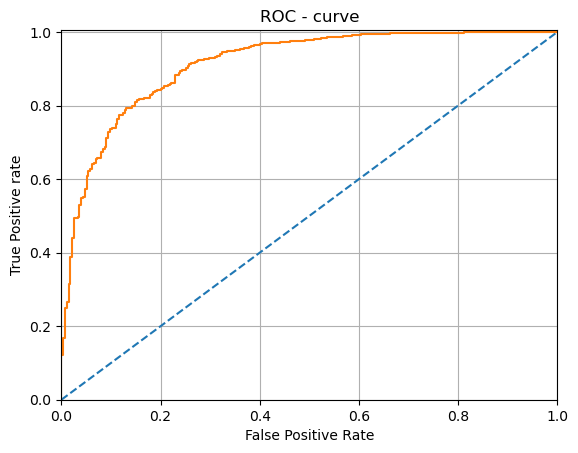

In [47]:
trp, frp, treshold = roc_curve(target_test, predict_proba[:, 1])

plt.plot([0, 1], linestyle='dashed')
plt.plot(trp, frp)

plt.title('ROC - curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim([0, 1])
plt.ylim([0, 1.005])

plt.grid()

**Вывод по пункту 5**

В результате анализа моделей и оценки их показателей, был сделан вывод, что для задачи классификации пользователей наиболее подходящей является модель градиентного бустинга LGBMClassifier.

Применение данной модели позволило достичь итоговой метрики roc_auc равной 0.912, что превышает заданный техническим заданием показатель, равный 0.85.

Успех был достигнут путем исключения признаков, тесно связанных с другими признаками, добавления собственных признаков и проведения кодирования и масштабирования данных.

## Отчет

В данной работе нами были проделаны следующие шаги:

**1)**  Были загружены и изучены данные. Исходя из результатов исследования 4-х таблиц, был сделан вывод о наличии в нем 7043 строк в различных типах данных. 

**2)**  В результате предобработки данных и объединения таблиц был получен датасет с 7043 строками и 20 столбцами. Были изменены типы данных в столбцах TotalCharges, EndDate, BeginDate. 

В таблице было большое количество пропусков в столбце EndDate (85%) и столбцах с услугами (22%), а так же небольшое количество пропусков в столбце MultipleLines (9.68). Так же стоит отметить о наличии 0.16% пропусков в столбце TotalCharges, что вероятно являлось просто ошибкой. Поскольку такой процент пропусков нельзя просто так удалить, тем более имея выборку в 7043 строк, было принято решение их заполнить. 
   - **EndDAte** - пропуски считались клиентами еще не покинувшими компанию
   - **Услуги** - наличие пропуска говорит о том, что клиент не использует данные услуги, поэтому заполняли на "No"
   - **MultipleLines** - Аналогично услугам только для другого типа.
Так же стоит отметить, что в таблице отсутствовали дубликаты.
   
**3)** В ходе подготовки данных были удалены неинформативные признаки, например customerID, EndDate и так далее и был добавлен целевой признак - StillUser. Так же не был выполнен пункт плана по добавлению новых признаков из-за того, что признак дублировал исходный признак ( корреляция ~1) 

**4)** В ходе исследовательского анализа данных был сделан вывод, что целевой признак не сбалансирован и имеет явный перевес в сторону активных пользователей - 84.34% против 15.66%
        
Людей которые используют услуги оказалось гораздо меньше чем людей не предпочитающих использоване услуг.

Основная масса пользователей вероятно молодеж поскольку пользователей пенсионного возрста или с детьми не большая часть от свего датасета. 

**5)** Для обучения модели данные были разбиты на выборки, а так же подготовлены для обучения. Проведены этапы:
  - Кодирование. OHE для логистической регресии и OrdinalEncoder для остальных моделей. 
  - Масштабирование с помощью StandardScaler
  - Удалены признаки с услугами за исключением одного столбца, поскольку очень сильно коррелировали между собой и со столбцов MonthlyCharges

**Возникшие трудности**

- Пропуски в поле TotalCharges. Слишком маленькое количество пропусков и в таком важном поле было странным. Были трудности с определением природы возникновения данных пропусков и следовательно с трудностью их заполнения. Но поскольку их было всего 0.16 процента, то было принято решение их удалить. 


- Возникновение мультикоррениарности. Трудностью можно назвать процесс выбора порога для определения сильной корреляции. Было приянто решение не использовать определенное числовое значение, а просто удалить столбцы, которые можно сказать дублировали друг друга, как например поля с услугами

**Ключевые моменты**

Ключевыми моментами можно назвать предобработку данных, поскольку чрезмерное удаление признаков или их добавление очень сильно сказывалось на итоговой метрике и не всегда в лучшую сторону. 

Так же стоит отметить, что проверка нескольких моделей и подбор гипперпараметров помог найти лучшую модель и подобрать к ней такие параметры, которые обеспечивали высокую метрику удовлетворяющую ТЗ.

**Признаки**

Для обучения модели были выделены следующие признаки.
- Type, PaperlessBilling, PaymentMethod, Dependents, Senior Citizen ,Partner, MultipleLines, OnlineSecurity - категориальные и  MonthlyCharges, DayDuration - численные.

В столбцах OnlineSecurity, MultipleLines были удалены пропуски на этапе подготовки данных. 

Так же все категориальные данные были закодированы, а численные отмасштабированы, что позволило модели повысить свою метрику. Стоит омтетить, что столбец DayDuration был добавлен на основе признаков BeginDate и EndDate.

**Модель**

После проверки трех моделей на тренировочной выборке с помощью кросс-валидации было принято решение использовать модель LGBMClassifier имеющий наибольшую выборку. 

После подбора гиперпараметров с помощью библиотеки Optuna были получены следущие параметры:

In [48]:
print(f'Random State = {RANDOM_STATE}')
study_lgbm.best_params

Random State = 280823


{'num_leaves': 398,
 'max_depth': 19,
 'learning_rate': 0.35989303810750894,
 'n_estimators': 673,
 'min_child_samples': 4,
 'subsample': 0.3896438177941124,
 'colsample_bytree': 0.10017372416652745,
 'reg_alpha': 1.1804695021487253,
 'reg_lambda': 2.513041126402558}

И получена следующая метрика AUC-ROC:

In [49]:
print(f'AUC-ROC : {round(auc, 2)}')

AUC-ROC : 0.91


AUC-curve модели в свою очередь выглядела следующим образом:

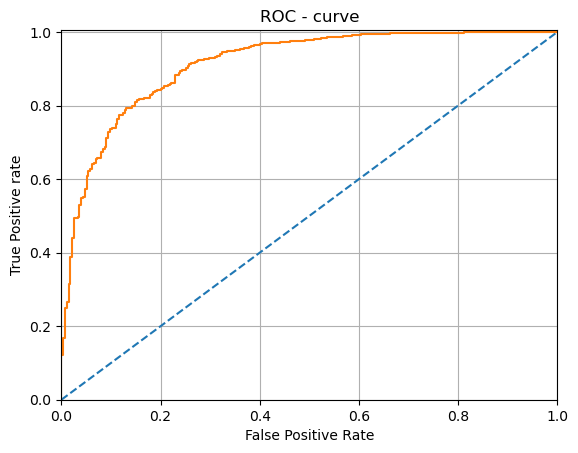

In [50]:
trp, frp, treshold = roc_curve(target_test, predict_proba[:, 1])

plt.plot([0, 1], linestyle='dashed')
plt.plot(trp, frp)

plt.title('ROC - curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim([0, 1])
plt.ylim([0, 1.005])

plt.grid()